<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده مهندسی برق و کامپیوتر
            </font>
			<p></p>
			<font color=blue>
مبانی هوش محاسباتی
            </font>
			<br />
			<br />
بهار ۱۴۰۱/۱۴۰۲
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
تکلیف کامپیوتری اول
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
علیرضا ابره فروش
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
9816603
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
	</font>
</div>

# 1

### پيش پردازش داده هاي ورودي

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [83]:
cross_validation_df = pd.read_csv("clean1.data/clean1.data", delimiter = ",", header = None)
train_df = pd.read_csv("clean2.data/clean2.data", delimiter = ",", header = None)

In [84]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0


In [85]:
def normalize(df):
    normalized_df = df.copy()
    columns_to_normalize = [i for i in range(2, 168)]
    min_max_scaler = preprocessing.MinMaxScaler()
    normalized_df[columns_to_normalize] = min_max_scaler.fit_transform(normalized_df[columns_to_normalize])
    normalized_df = pd.DataFrame(normalized_df)
    return normalized_df

train_df_normalized = normalize(train_df)

### پياده سازي تابع رگرسيون لاجيستيك

In [86]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def getCost(y, y_hat):
    epsilon = 1e-5
    cost = -np.mean(y * (np.log(y_hat + epsilon)) + (1 - y) * np.log(1 - y_hat + epsilon))
    return cost

def addBias(X):
    n_samples, n_features = X.shape
    weights = np.random.random(n_features)
    if ("bias" not in X.columns):
        vector_of_ones = np.ones(n_samples)
        X.insert(0, "bias", vector_of_ones)
        r = np.random.random()
        weights = np.append([r], weights)
    return X, weights

def logistic_regression(X, y, learning_rate, num_iterations, add_intercept):
    n_samples, n_features = X.shape
    cost_history = np.zeros(num_iterations,)
    if (add_intercept is True):
        X, weights = addBias(X)
    else:
        weights = np.random.random(n_features)
    for i in range(num_iterations):
        z = np.dot(X, weights)
        sig_z = sigmoid(z)
        sig_z_y = sig_z - y
        weights = weights - learning_rate * np.dot(X.T, sig_z_y)
        cost_history[i] = getCost(y, sig_z)
    
    return weights, cost_history

### آموزش و تست مدل

In [87]:
X_train = train_df_normalized.iloc[:, 2: -1].copy()
y_train = train_df_normalized.iloc[:, -1].copy()

#### نرخ یادگیری کوچک

In [88]:
weights1, cost_history1 = logistic_regression(X_train, y_train, 0.00001, 50, True)

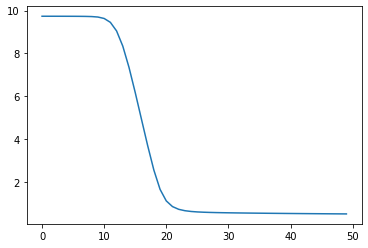

In [89]:
plt.plot(cost_history1)

#### نرخ یادگیری بزرگ

In [90]:
weights2, cost_history2 = logistic_regression(X_train, y_train, 0.1, 50, True)

<ipython-input-86-8f4061c857a4>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


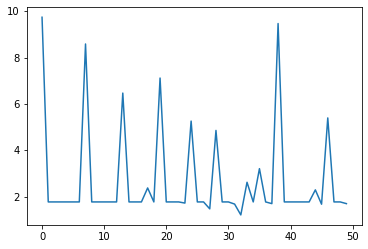

In [91]:
plt.plot(cost_history2)

###### هنگامی که نرخ یادگیری کوچک است مدل همگرا به نقطه بهینه می‌شود. همانطور که می‌بینیم در این حالت بدون نوسان تابع هزینه‌‌ی ما کاهش می‌یابد. درحالی که وقتی نرخ یادگیری بزرگ است مدل نوسانی عمل می‌کند و به بهینه‌ای همگرا نمی‌شود.

In [92]:
cross_validation_df_normalized = normalize(cross_validation_df)
X_cross_validation = cross_validation_df_normalized.iloc[:, 2: -1].copy()
X_cross_validation, cvw = addBias(X_cross_validation)
y_cross_validation = cross_validation_df_normalized.iloc[:, -1].copy()

In [93]:
def predict(X, weights):
    z = np.dot(X, weights)
    y_hat = np.round(sigmoid(z))
    #y_hat = sigmoid(z)
    return y_hat

In [94]:
y_hat = predict(X_cross_validation, weights1)

### محاسبه‌ي پارامترهاي ذكر شده و توضيح آن‌ها

In [95]:
rec = recall_score(y_true = y_cross_validation, y_pred = y_hat)
acc = accuracy_score(y_true = y_cross_validation, y_pred = y_hat)
f1 = f1_score(y_true = y_cross_validation, y_pred = y_hat)
print(rec, acc, f1)

0.0 0.5315126050420168 0.0


# 2

In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns = iris['feature_names'] + ['target'])

In [97]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [98]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### الف

In [99]:
#train_test_split from scratch
def trainTestSplit(df, ratio):
    new_df = df.copy()
    new_df = new_df.sample(frac = 1)
    total_rows = new_df.shape[0]
    train_size = int(total_rows * ratio)
    train = new_df[0: train_size]
    test = new_df[train_size: ]
    return train, test

In [100]:
feature_names = ["sepal length (cm)",	"sepal width (cm)",	"petal length (cm)", "petal width (cm)"]
target_name = ["target"]
# split the data set into train and test
iris_train, iris_test = trainTestSplit(iris_df, 0.8)

X_train = iris_train[feature_names]
y_train = iris_train[target_name]
X_test = iris_test[feature_names]
y_test = iris_test[target_name]


### ب

In [101]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def forward_propagation(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)
    return y_hat, a1

def back_propagation(X, y, y_hat, a1, W2):
    delta2 = (y_hat - y) * sigmoid_derivative(y_hat)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
    return dW1, db1, dW2, db2

def calculate_error(y, y_hat):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def calculate_accuracy(y_true, y_pred):
    y_pred_labels = np.round(y_pred)
    correct_predictions = np.sum(y_true == y_pred_labels)
    accuracy = correct_predictions / y_true.shape[0]
    return accuracy


def train_SGD(df, learning_rate, epochs):
    X = df.drop(columns=['target']).values
    y = df['target'].values.reshape(-1, 1)
    np.random.seed(1)
    W1 = np.random.randn(X.shape[1], 5) * 0.01
    b1 = np.zeros((1, 5))
    W2 = np.random.randn(5, 1) * 0.01
    b2 = np.zeros((1, 1))
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            x_i = X[i].reshape(1, -1)
            y_i = y[i].reshape(1, -1)
            y_hat, a1 = forward_propagation(x_i, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = back_propagation(x_i, y_i, y_hat, a1, W2)
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
        if (epoch + 1) % 10 == 0:
            error = calculate_error(y, forward_propagation(X, W1, b1, W2, b2)[0])
            print(f"Epoch {epoch + 1}/{epochs}: Error = {error:.4f}")
    return W1, b1, W2, b2


In [102]:
alpha = 0.001
n_epochs = 100
sgd_W1, sgd_b1, sgd_W2, sgd_b2 = train_SGD(iris_train, alpha, n_epochs)

Epoch 10/100: Error = 0.5722
Epoch 20/100: Error = 0.4736
Epoch 30/100: Error = 0.3850
Epoch 40/100: Error = 0.3073
Epoch 50/100: Error = 0.2433
Epoch 60/100: Error = 0.1932
Epoch 70/100: Error = 0.1555
Epoch 80/100: Error = 0.1277
Epoch 90/100: Error = 0.1077
Epoch 100/100: Error = 0.0936


### ج

In [103]:
def train_minibatchGD(df, learning_rate, epochs, batch_size):
    # get X and y from dataframe
    X = df.drop(columns=['target']).values
    y = df['target'].values.reshape(-1, 1)

    # initialize weights and biases
    n_input = X.shape[1]
    n_hidden = 5
    n_output = 1
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output)
    b2 = np.zeros((1, n_output))

    # initialize loss array
    losses = []

    # loop through epochs
    for epoch in range(epochs):
        # shuffle data
        indices = np.random.permutation(X.shape[0])
        X = X[indices]
        y = y[indices]

        # loop through mini-batches
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            # forward propagation
            y_hat, a1 = forward_propagation(X_batch, W1, b1, W2, b2)

            # calculate error and append to loss array
            error = calculate_error(y_batch, y_hat)
            losses.append(error)
            print(f"Epoch {epoch + 1}/{epochs}, : Error = {error:.4f}")

            # back propagation
            dW1, db1, dW2, db2 = back_propagation(X_batch, y_batch, y_hat, a1, W2)

            # update weights and biases
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

    return W1, b1, W2, b2, losses

In [104]:
b_s = 1000
mbgd_W1, mbgd_b1, mbgd_W2, mbgd_b2, mbgd_loss = train_minibatchGD(iris_train, alpha, n_epochs, b_s)

Epoch 1/100, : Error = 0.3752
Epoch 2/100, : Error = 0.3648
Epoch 3/100, : Error = 0.3547
Epoch 4/100, : Error = 0.3449
Epoch 5/100, : Error = 0.3353
Epoch 6/100, : Error = 0.3258
Epoch 7/100, : Error = 0.3163
Epoch 8/100, : Error = 0.3067
Epoch 9/100, : Error = 0.2967
Epoch 10/100, : Error = 0.2861
Epoch 11/100, : Error = 0.2745
Epoch 12/100, : Error = 0.2613
Epoch 13/100, : Error = 0.2461
Epoch 14/100, : Error = 0.2281
Epoch 15/100, : Error = 0.2067
Epoch 16/100, : Error = 0.1810
Epoch 17/100, : Error = 0.1507
Epoch 18/100, : Error = 0.1158
Epoch 19/100, : Error = 0.0766
Epoch 20/100, : Error = 0.0342
Epoch 21/100, : Error = -0.0102
Epoch 22/100, : Error = -0.0548
Epoch 23/100, : Error = -0.0985
Epoch 24/100, : Error = -0.1400
Epoch 25/100, : Error = -0.1787
Epoch 26/100, : Error = -0.2141
Epoch 27/100, : Error = -0.2462
Epoch 28/100, : Error = -0.2750
Epoch 29/100, : Error = -0.3008
Epoch 30/100, : Error = -0.3239
Epoch 31/100, : Error = -0.3444
Epoch 32/100, : Error = -0.3627
Epoch

### د

In [105]:
def train_GD(df, lr, epochs):
    # Prepare the data
    X = df.drop('target', axis=1).values
    y = df['target'].values.reshape(-1, 1)

    # Initialize the weights and biases
    n_inputs = X.shape[1]
    n_hidden = 4
    n_outputs = 1
    W1 = np.random.randn(n_inputs, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_outputs)
    b2 = np.zeros((1, n_outputs))

    error_history = []
    accuracy_history = []

    # Train the model
    for epoch in range(epochs):
        # Forward propagation
        y_hat, a1 = forward_propagation(X, W1, b1, W2, b2)

        # Backward propagation
        dW1, db1, dW2, db2 = back_propagation(X, y, y_hat, a1, W2)

        # Update the weights and biases
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        # Print the error and accuracy every 100 epochs
        error = calculate_error(y, y_hat)
        accuracy = calculate_accuracy(y, y_hat)
        error_history.append(error)
        accuracy_history.append(accuracy)
        print(f'Epoch {epoch}: error={error}, accuracy={accuracy}')

    # Return the final weights and biases
    return W1, b1, W2, b2, error_history, accuracy_history

In [109]:
n_epochs = 500
gd_W1, gd_b1, gd_W2, gd_b2, e_hist, a_hist = train_GD(iris_train, 0.0001, n_epochs)

Epoch 0: error=2.2181420038839232, accuracy=0.35
Epoch 1: error=2.208812305999971, accuracy=0.35
Epoch 2: error=2.199491417437442, accuracy=0.35
Epoch 3: error=2.1901793360552637, accuracy=0.35
Epoch 4: error=2.1808760562279943, accuracy=0.35
Epoch 5: error=2.1715815684730204, accuracy=0.35
Epoch 6: error=2.162295859058607, accuracy=0.35
Epoch 7: error=2.153018909591999, accuracy=0.35
Epoch 8: error=2.1437506965866793, accuracy=0.35
Epoch 9: error=2.1344911910079274, accuracy=0.35
Epoch 10: error=2.1252403577957435, accuracy=0.35
Epoch 11: error=2.1159981553641964, accuracy=0.35
Epoch 12: error=2.106764535076244, accuracy=0.35
Epoch 13: error=2.0975394406930006, accuracy=0.35
Epoch 14: error=2.0883228077964593, accuracy=0.35
Epoch 15: error=2.079114563184603, accuracy=0.35
Epoch 16: error=2.069914624237841, accuracy=0.35
Epoch 17: error=2.0607228982556816, accuracy=0.35
Epoch 18: error=2.051539281762531, accuracy=0.35
Epoch 19: error=2.0423636597814805, accuracy=0.35
Epoch 20: error=2.

### ه

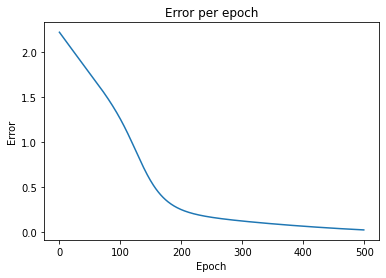

In [110]:
plt.plot(range(n_epochs), e_hist)
plt.title('Error per epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

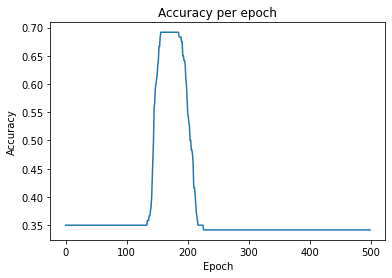

In [111]:
plt.plot(range(n_epochs), a_hist)
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### و

### ز

In [112]:
#each time it chooses a random values for weights
gd1_W1, gd1_b1, gd1_W2, gd1_b2, e1_hist, a1_hist = train_GD(iris_train, 0.0001, n_epochs)
gd2_W1, gd2_b1, gd2_W2, gd2_b2, e2_hist, a2_hist = train_GD(iris_train, 0.0001, n_epochs)
gd3_W1, gd3_b1, gd3_W2, gd3_b2, e3_hist, a3_hist = train_GD(iris_train, 0.0001, n_epochs)

Epoch 0: error=1.0836115358558431, accuracy=0.35
Epoch 1: error=1.0785086249430968, accuracy=0.35
Epoch 2: error=1.0733973630475768, accuracy=0.35
Epoch 3: error=1.068277755324756, accuracy=0.35
Epoch 4: error=1.0631498179333512, accuracy=0.35
Epoch 5: error=1.0580135780386535, accuracy=0.35
Epoch 6: error=1.052869073794985, accuracy=0.35
Epoch 7: error=1.0477163543065986, accuracy=0.35
Epoch 8: error=1.042555479566392, accuracy=0.35
Epoch 9: error=1.0373865203718609, accuracy=0.35
Epoch 10: error=1.0322095582177748, accuracy=0.35
Epoch 11: error=1.0270246851651297, accuracy=0.35
Epoch 12: error=1.0218320036860038, accuracy=0.35
Epoch 13: error=1.0166316264840287, accuracy=0.35
Epoch 14: error=1.0114236762902646, accuracy=0.35
Epoch 15: error=1.0062082856343764, accuracy=0.35
Epoch 16: error=1.0009855965910923, accuracy=0.35
Epoch 17: error=0.9957557605020463, accuracy=0.35
Epoch 18: error=0.990518937673205, accuracy=0.35
Epoch 19: error=0.985275297048204, accuracy=0.35
Epoch 20: error

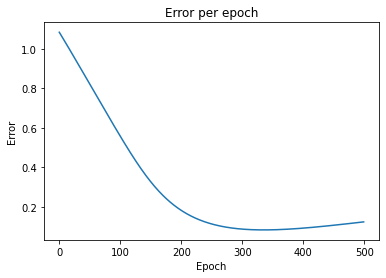

In [115]:
plt.plot(range(n_epochs), e1_hist)
plt.title('Error per epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

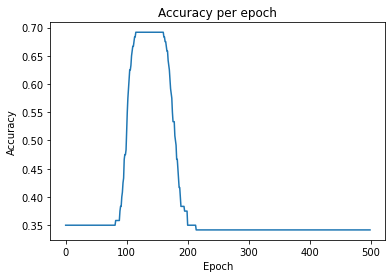

In [116]:
plt.plot(range(n_epochs), a1_hist)
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

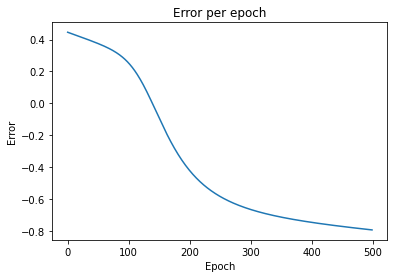

In [117]:
plt.plot(range(n_epochs), e2_hist)
plt.title('Error per epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

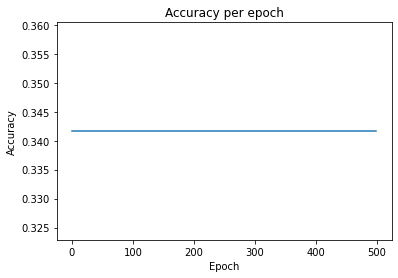

In [118]:
plt.plot(range(n_epochs), a2_hist)
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

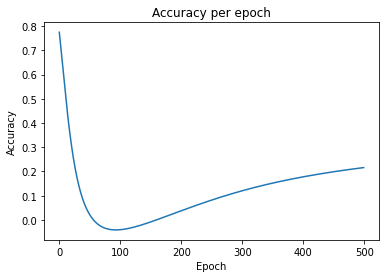

In [119]:
plt.plot(range(n_epochs), e3_hist)
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

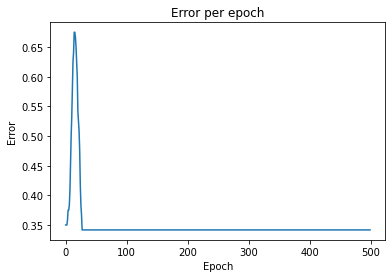

In [120]:
plt.plot(range(n_epochs), a3_hist)
plt.title('Error per epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()